# Example 8

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, VoltageSource, CurrentSource, Resistor, Line, LabelNode, Ground
from CircuitCalculator.SimpleCircuit.DiagramParser import SchematicDiagramAnalyzer, SchematicDiagramSolution, network_parser
from CircuitCalculator.NodalAnalysis import nodal_analysis_solver

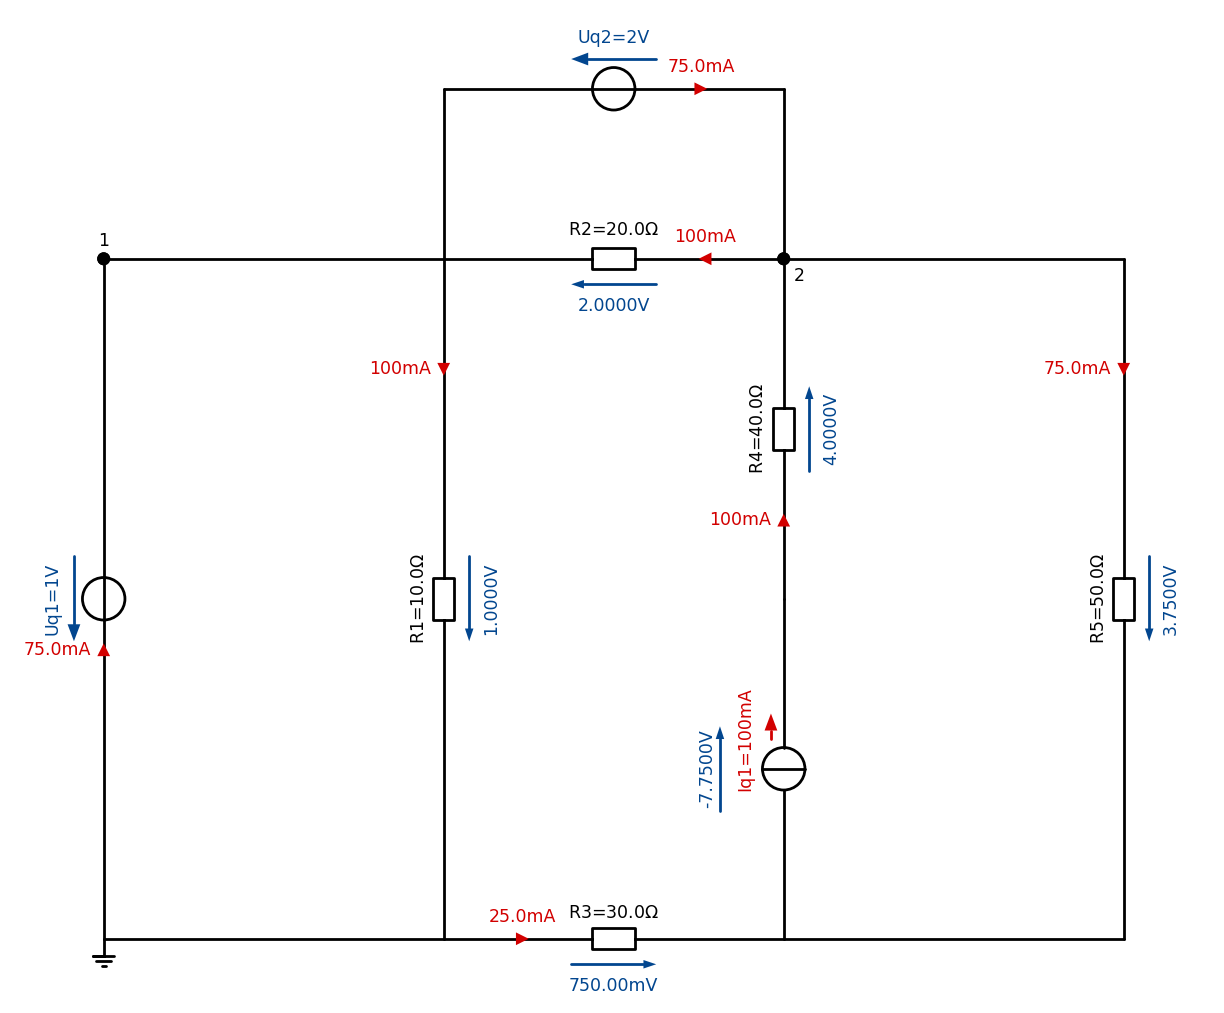

In [2]:
R1, R2, R3, R4, R5 = 10, 20, 30, 40, 50
Uq1, Uq2, Iq1 = 1, 2, 0.1

unit = 8
with Schematic(unit=unit) as schematic:
    schematic += (N0 := Ground())
    schematic += VoltageSource(V=Uq1, name='Uq1', precision=1).up().length(2*unit)
    schematic += (N1 := LabelNode(id='1', id_loc='N'))
    schematic += Line().right()
    schematic += Line().up().length(unit/2)
    schematic += VoltageSource(V=Uq2, name='Uq2', precision=1).right()
    schematic += Line().down().length(unit/2)
    schematic += (N2 := LabelNode(id='2', id_loc='SE'))
    schematic += Resistor(R=R2, name='R2').left()
    schematic += Resistor(R=R1, name='R1').down().length(2*unit)
    schematic += Resistor(R=R3, name='R3').right()
    schematic += CurrentSource(I=Iq1, name='Iq1', precision=1).up()
    schematic += Resistor(R=R4, name='R4').up()
    schematic += Line().right()
    schematic += Resistor(R=R5, name='R5').down().length(2*unit)
    schematic += Line().left()
    schematic += Line().at(N0.start).right()
    solution = nodal_analysis_solver(network_parser(schematic))
    schemdraw_solution = SchematicDiagramSolution(SchematicDiagramAnalyzer(schematic), solution)
    schematic += schemdraw_solution.draw_voltage('R1', precision=5)
    schematic += schemdraw_solution.draw_voltage('R2', precision=5)
    schematic += schemdraw_solution.draw_voltage('R3', precision=5)
    schematic += schemdraw_solution.draw_voltage('R4', precision=5)
    schematic += schemdraw_solution.draw_voltage('R5', precision=5)
    schematic += schemdraw_solution.draw_voltage('Iq1', precision=5)
    schematic += schemdraw_solution.draw_current('R1')
    schematic += schemdraw_solution.draw_current('R2')
    schematic += schemdraw_solution.draw_current('R3')
    schematic += schemdraw_solution.draw_current('R4')
    schematic += schemdraw_solution.draw_current('R5')
    schematic += schemdraw_solution.draw_current('Uq1')
    schematic += schemdraw_solution.draw_current('Uq2')